### This is the notebook where we merge the already edited df of session, tur and delture. There are already included the differences that have been made in the efterkod version

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
def show_scrollable(df, max_rows=20, height=400):
    html = df.head(max_rows).to_html(notebook=True)
    display(HTML(f'<div style="overflow:auto; height:{height}px">{html}</div>'))

In [3]:
df_s = pd.read_csv('Data/TuSession_Edited_Nicola.csv', encoding='latin1') #we don't need the eftekod as the mod values are already here
df_t = pd.read_csv('Data/EfterkodTur_Edited_Nicola.csv', encoding='latin1')
df_d = pd.read_csv('Data/EfterkodDelture_Edited_Nicola.csv', encoding='latin1')

In [4]:
df_t.rename(columns={'sessionid':'SessionId'}, inplace=True)

next cell will substitute raw with mod values, if mod is not null

In [5]:
df_s.loc[pd.notna(df_s['startTripText_mod']), 'startTripText_raw'] = df_s['startTripText_mod']
df_s.drop(columns=['startTripText_mod'], inplace=True)

df_s.loc[pd.notna(df_s['startstedadre_mod']), 'startstedadre_raw'] = df_s['startstedadre_mod']
df_s.drop(columns=['startstedadre_mod'], inplace=True)

df_s.loc[pd.notna(df_s['startstedadrn_mod']), 'startstedadrn_raw'] = df_s['startstedadrn_mod']
df_s.drop(columns=['startstedadrn_mod'], inplace=True)

df_s.loc[pd.notna(df_s['startDayText_mod']), 'startDayText_raw'] = df_s['startDayText_mod']
df_s.drop(columns=['startDayText_mod'], inplace=True)

df_s.loc[pd.notna(df_s['workText_mod']), 'workText_raw'] = df_s['workText_mod']
df_s.drop(columns=['workText_mod'], inplace=True)

df_t.loc[pd.notna(df_t['tiladrn_mod']), 'tiladrn_raw'] = df_t['tiladrn_mod']
df_t.drop(columns=['tiladrn_mod'], inplace=True)

df_t.loc[pd.notna(df_t['tiladre_mod']), 'tiladre_raw'] = df_t['tiladre_mod']
df_t.drop(columns=['tiladre_mod'], inplace=True)

df_t.loc[pd.notna(df_t['tiladrtext_mod']), 'tiladrtext_raw'] = df_t['tiladrtext_mod']
df_t.drop(columns=['tiladrtext_mod'], inplace=True)

df_d.loc[pd.notna(df_d['stagelength_mod']), 'stagelength_raw'] = df_d['stagelength_mod']
df_d.drop(columns=['stagelength_mod'], inplace=True)

df_d.loc[pd.notna(df_d['stagedurationmin_mod']), 'stagedurationmin_raw'] = df_d['stagedurationmin_mod']
df_d.drop(columns=['stagedurationmin_mod'], inplace=True)

In [6]:
df_st= pd.merge(df_s, df_t, on='SessionId', suffixes=('_session', '_ture'))

In [7]:
df_std = pd.merge(df_st, df_d, on='turid', suffixes=('', '_delture'))

In [8]:
df_std.columns

Index(['SessionId', 'homeText_raw', 'homeadre', 'homeadrn', 'workText_raw',
       'workple', 'workpln', 'startDayText_raw', 'startstedadrsogeord',
       'startTripText_raw', 'startstedadre_raw', 'startstedadrn_raw',
       'daystartmuncode', 'turid', 'tiladrsogeord', 'tiladrtext_raw',
       'tiladrn_raw', 'tiladre_raw', 'transportmiddel', 'stagelength_raw',
       'stagedurationmin_raw'],
      dtype='object')

In [9]:
df_std[['homeadre', 'homeadrn', 'workple', 'workpln']] = df_std[['homeadre', 'homeadrn', 'workple', 'workpln']].astype(float).astype('Int64')

### By doing this we ensure continuity in the loop of the Session Ids (because we were missing the startpoint for the consequent trip)

In [10]:
# Sort df_std by SessionId and turid to ensure trips are in sequence order
df_std = df_std.sort_values(['SessionId', 'turid'])

# Update start fields to reflect the end fields of the previous trip in the same session
# For the first trip in each session, keep the original start values
df_std['startstedadrsogeord'] = df_std.groupby('SessionId')['tiladrsogeord'].shift(1).fillna(df_std['startstedadrsogeord'])
df_std['startTripText_raw'] = df_std.groupby('SessionId')['tiladrtext_raw'].shift(1).fillna(df_std['startTripText_raw'])
df_std['startstedadre_raw'] = df_std.groupby('SessionId')['tiladre_raw'].shift(1).fillna(df_std['startstedadre_raw'])
df_std['startstedadrn_raw'] = df_std.groupby('SessionId')['tiladrn_raw'].shift(1).fillna(df_std['startstedadrn_raw'])

In [11]:
df_std.head(5)

,SessionId,homeText_raw,homeadre,homeadrn,workText_raw,workple,workpln,startDayText_raw,startstedadrsogeord,startTripText_raw,...,startstedadrn_raw,daystartmuncode,turid,tiladrsogeord,tiladrtext_raw,tiladrn_raw,tiladre_raw,transportmiddel,stagelength_raw,stagedurationmin_raw
0,347009,"Bellisvej 38, 2970 Hørsholm",718307,6198520,"Tuborg Havnevej 19, 2900 Hellerup",725048,6181528,"Bellisvej 38, 2970 Hørsholm",NaN,"Bellisvej 38, 2970 Hørsholm",...,6198520.0,NaN,2118077,Ahornvej 30 2970 Hørshol,"ahornvej 30, 2970 hørsholm",6199137,718433,1.0,1.0,10.0
1,347009,"Bellisvej 38, 2970 Hørsholm",718307,6198520,"Tuborg Havnevej 19, 2900 Hellerup",725048,6181528,"Bellisvej 38, 2970 Hørsholm",Ahornvej 30 2970 Hørshol,"ahornvej 30, 2970 hørsholm",...,6199137.0,NaN,2118078,NaN,"bellisvej 38, 2970 hørsholm",6198520,718307,11.0,1.0,3.0
2,347010,"Keilstruplund 83, 3460 Birkerød",715687,6193548,"Kongens Vænge 2A, 3400 Hillerød",709139,6203428,"Keilstruplund 83, 3460 Birkerød",NaN,"Keilstruplund 83, 3460 Birkerød",...,6193548.0,NaN,2118081,Høsterkøb kirke,"høsterkøb kirke, gøngehusvej 286, 2970 hørsholm",6195042,718391,11.0,5.0,10.0
3,347010,"Keilstruplund 83, 3460 Birkerød",715687,6193548,"Kongens Vænge 2A, 3400 Hillerød",709139,6203428,"Keilstruplund 83, 3460 Birkerød",Høsterkøb kirke,"høsterkøb kirke, gøngehusvej 286, 2970 hørsholm",...,6195042.0,NaN,2118082,NaN,"keilstruplund 83, 3460 birkerød",6193548,715687,11.0,5.0,10.0
4,347013,"Herslevvej 12, Trællerup, 4000 Roskilde",686952,6172090,"Køgevej 5, 4000 Roskilde",693967,6169963,"Herslevvej 12, Trællerup, 4000 Roskilde",NaN,"Herslevvej 12, Trællerup, 4000 Roskilde",...,6172090.0,NaN,2118083,Gevninge Bygade 2 4000,"dagli´brugsen, gevninge bygade 2, gevninge, 40...",6170097,686374,11.0,3.0,5.0


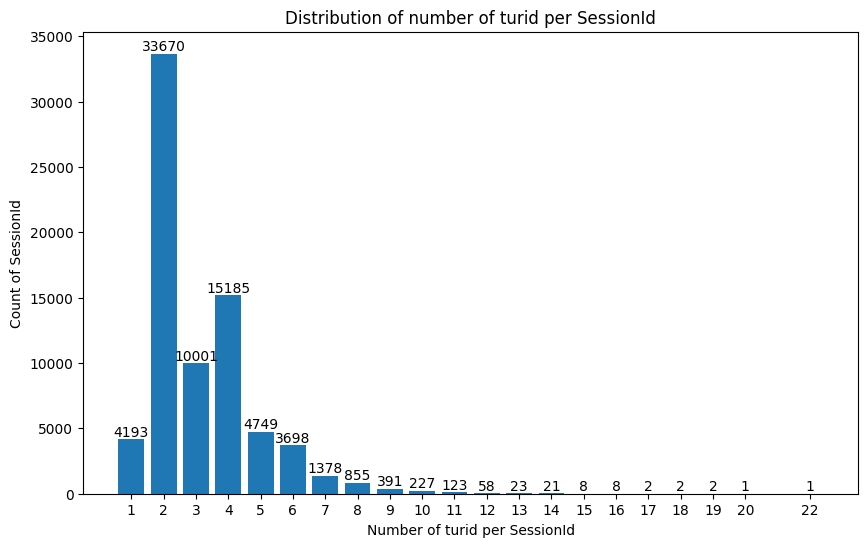

In [12]:
# compute number of turid per SessionId (use nunique to be safe)
counts = df_std.groupby('SessionId')['turid'].nunique().reset_index(name='n_turid')

# aggregate to get distribution: x = number of turid, y = count of SessionId with that many turid
dist = counts['n_turid'].value_counts().sort_index().rename_axis('n_turid').reset_index(name='session_count')

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.bar(dist['n_turid'], dist['session_count'])
plt.xlabel('Number of turid per SessionId')
plt.ylabel('Count of SessionId')
plt.title('Distribution of number of turid per SessionId')

# Add counts on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')

plt.xticks(dist['n_turid'])
plt.show()

In [13]:
df_std.columns

Index(['SessionId', 'homeText_raw', 'homeadre', 'homeadrn', 'workText_raw',
       'workple', 'workpln', 'startDayText_raw', 'startstedadrsogeord',
       'startTripText_raw', 'startstedadre_raw', 'startstedadrn_raw',
       'daystartmuncode', 'turid', 'tiladrsogeord', 'tiladrtext_raw',
       'tiladrn_raw', 'tiladre_raw', 'transportmiddel', 'stagelength_raw',
       'stagedurationmin_raw'],
      dtype='object')

In [14]:
df_efterkod_short = df_std.tail(1000) 

In [15]:
# df_efterkod_short.to_csv('Data/playbook_efterkod_short.csv', index=False, encoding='latin1')

In [16]:
from pyproj import Transformer

# UTM Zone 32N for Denmark (EPSG:32632) to WGS84 (EPSG:4326)
transformer = Transformer.from_crs("EPSG:32632", "EPSG:4326", always_xy=True)

In [17]:
def utm_to_latlon(easting, northing):
    if pd.isna(easting) or pd.isna(northing):
        return pd.NA, pd.NA
    try:
        lon, lat = transformer.transform(easting, northing)
        return lat, lon
    except Exception as e:
        print(f"Error converting {easting}, {northing}: {e}")
        return pd.NA, pd.NA

In [18]:
# Convert raw UTM columns to numeric (float), coercing errors to NaN
df_std['startstedadre_raw'] = pd.to_numeric(df_std['startstedadre_raw'], errors='coerce')
df_std['startstedadrn_raw'] = pd.to_numeric(df_std['startstedadrn_raw'], errors='coerce')
df_std['tiladre_raw'] = pd.to_numeric(df_std['tiladre_raw'], errors='coerce')
df_std['tiladrn_raw'] = pd.to_numeric(df_std['tiladrn_raw'], errors='coerce')

In [19]:
# Convert home coordinates
df_std['home_lat'], df_std['home_lon'] = zip(*df_std.apply(lambda row: utm_to_latlon(row['homeadre'], row['homeadrn']), axis=1))

In [20]:
# Convert work coordinates
df_std['work_lat'], df_std['work_lon'] = zip(*df_std.apply(lambda row: utm_to_latlon(row['workple'], row['workpln']), axis=1))

In [21]:
# Convert start coordinates
df_std['start_lat'], df_std['start_lon'] = zip(*df_std.apply(lambda row: utm_to_latlon(row['startstedadre_raw'], row['startstedadrn_raw']), axis=1))

In [22]:
# Convert til (destination) coordinates
df_std['til_lat'], df_std['til_lon'] = zip(*df_std.apply(lambda row: utm_to_latlon(row['tiladre_raw'], row['tiladrn_raw']), axis=1))

In [23]:
# Check the new lat/lon columns
df_std[['home_lat', 'home_lon', 'work_lat', 'work_lon', 'start_lat', 'start_lon', 'til_lat', 'til_lon']].head()

,home_lat,home_lon,work_lat,work_lon,start_lat,start_lon,til_lat,til_lon
0,55.882587,12.490543,55.72711,12.584047,55.882587,12.490543,55.888063,12.493051
1,55.882587,12.490543,55.72711,12.584047,55.888063,12.493051,55.882587,12.490543
2,55.839173,12.444784,55.930675,12.348036,55.839173,12.444784,55.851356,12.489082
3,55.839173,12.444784,55.930675,12.348036,55.851356,12.489082,55.839173,12.444784
4,55.658612,11.971916,55.636779,12.081753,55.658612,11.971916,55.640950,11.961390


In [24]:
df_std.head(5)

,SessionId,homeText_raw,homeadre,homeadrn,workText_raw,workple,workpln,startDayText_raw,startstedadrsogeord,startTripText_raw,...,stagelength_raw,stagedurationmin_raw,home_lat,home_lon,work_lat,work_lon,start_lat,start_lon,til_lat,til_lon
0,347009,"Bellisvej 38, 2970 Hørsholm",718307,6198520,"Tuborg Havnevej 19, 2900 Hellerup",725048,6181528,"Bellisvej 38, 2970 Hørsholm",NaN,"Bellisvej 38, 2970 Hørsholm",...,1.0,10.0,55.882587,12.490543,55.72711,12.584047,55.882587,12.490543,55.888063,12.493051
1,347009,"Bellisvej 38, 2970 Hørsholm",718307,6198520,"Tuborg Havnevej 19, 2900 Hellerup",725048,6181528,"Bellisvej 38, 2970 Hørsholm",Ahornvej 30 2970 Hørshol,"ahornvej 30, 2970 hørsholm",...,1.0,3.0,55.882587,12.490543,55.72711,12.584047,55.888063,12.493051,55.882587,12.490543
2,347010,"Keilstruplund 83, 3460 Birkerød",715687,6193548,"Kongens Vænge 2A, 3400 Hillerød",709139,6203428,"Keilstruplund 83, 3460 Birkerød",NaN,"Keilstruplund 83, 3460 Birkerød",...,5.0,10.0,55.839173,12.444784,55.930675,12.348036,55.839173,12.444784,55.851356,12.489082
3,347010,"Keilstruplund 83, 3460 Birkerød",715687,6193548,"Kongens Vænge 2A, 3400 Hillerød",709139,6203428,"Keilstruplund 83, 3460 Birkerød",Høsterkøb kirke,"høsterkøb kirke, gøngehusvej 286, 2970 hørsholm",...,5.0,10.0,55.839173,12.444784,55.930675,12.348036,55.851356,12.489082,55.839173,12.444784
4,347013,"Herslevvej 12, Trællerup, 4000 Roskilde",686952,6172090,"Køgevej 5, 4000 Roskilde",693967,6169963,"Herslevvej 12, Trællerup, 4000 Roskilde",NaN,"Herslevvej 12, Trællerup, 4000 Roskilde",...,3.0,5.0,55.658612,11.971916,55.636779,12.081753,55.658612,11.971916,55.640950,11.961390


In [25]:
df_std.columns

Index(['SessionId', 'homeText_raw', 'homeadre', 'homeadrn', 'workText_raw',
       'workple', 'workpln', 'startDayText_raw', 'startstedadrsogeord',
       'startTripText_raw', 'startstedadre_raw', 'startstedadrn_raw',
       'daystartmuncode', 'turid', 'tiladrsogeord', 'tiladrtext_raw',
       'tiladrn_raw', 'tiladre_raw', 'transportmiddel', 'stagelength_raw',
       'stagedurationmin_raw', 'home_lat', 'home_lon', 'work_lat', 'work_lon',
       'start_lat', 'start_lon', 'til_lat', 'til_lon'],
      dtype='object')

In [26]:
# Drop the old UTM coordinate columns
df_std.drop(columns=['homeadre', 'homeadrn', 'workple', 'workpln', 'startstedadre_raw', 'startstedadrn_raw', 'tiladre_raw', 'tiladrn_raw'], inplace=True)

In [27]:
df_std.columns

Index(['SessionId', 'homeText_raw', 'workText_raw', 'startDayText_raw',
       'startstedadrsogeord', 'startTripText_raw', 'daystartmuncode', 'turid',
       'tiladrsogeord', 'tiladrtext_raw', 'transportmiddel', 'stagelength_raw',
       'stagedurationmin_raw', 'home_lat', 'home_lon', 'work_lat', 'work_lon',
       'start_lat', 'start_lon', 'til_lat', 'til_lon'],
      dtype='object')

In [ ]:
df_std.to_csv('FastCheckTUData.csv', index=False, encoding='utf-8')

: 